# Clustering(군집)
- 비지도 학습(unsupervised learning)중 하나

In [62]:
# npy: numpy 데이터
import numpy as np
import matplotlib.pyplot as plt

In [63]:
fruits = np.load('../ML/data/fruits_300.npy')

In [64]:
fruits.shape
# 100 * 100픽셀의 사진이 300장 있는 것이다

(300, 100, 100)

In [65]:
fruits[0,0] # 0번째 사진의 0번째 줄 을 보여주세요

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   2,   1,   2,   2,   2,   2,   2,   2,   1,   1,
         1,   1,   1,   1,   1,   1,   2,   3,   2,   1,   2,   1,   1,
         1,   1,   2,   1,   3,   2,   1,   3,   1,   4,   1,   2,   5,
         5,   5,  19, 148, 192, 117,  28,   1,   1,   2,   1,   4,   1,
         1,   3,   1,   1,   1,   1,   1,   2,   2,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1], dtype=uint8)

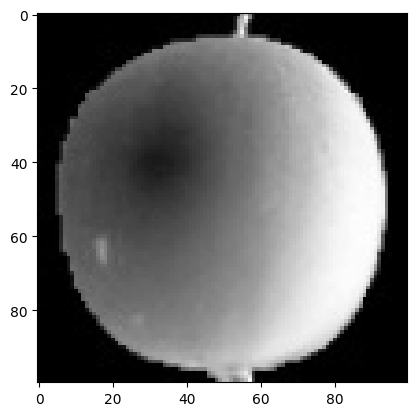

In [66]:
plt.imshow(fruits[0], cmap='gray') # cmap = 'gray': 회색으로 보겠다
plt.show()

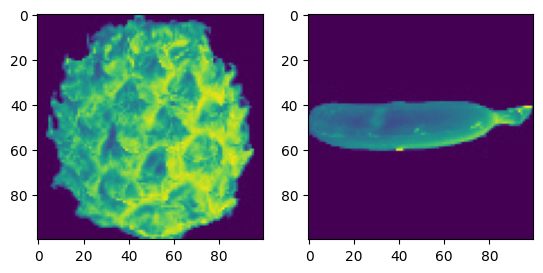

In [67]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100])
axs[1].imshow(fruits[200])

In [68]:
# 100 * 100 데이터를 길이 10,000인 1차원 배열로 바꿔준다
apple = fruits[:100].reshape(-1, 100*100) # -1: 전체 , 100*100 한줄로 만들어준다
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:].reshape(-1, 100*100)

In [69]:
apple.shape

(100, 10000)

In [70]:
apple.mean(axis=1)

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

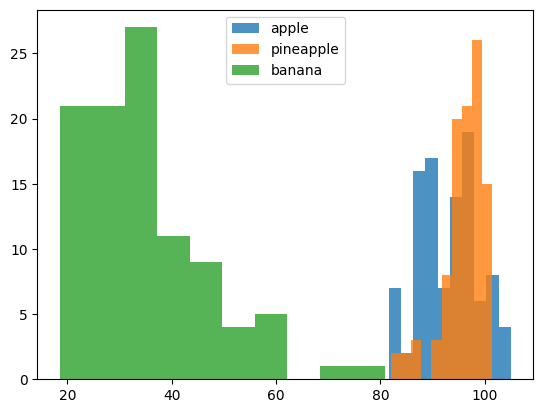

In [71]:
plt.hist(np.mean(apple, axis=1),alpha = 0.8)
plt.hist(np.mean(pineapple, axis=1),alpha = 0.8)
plt.hist(np.mean(banana, axis=1),alpha = 0.8)
plt.legend(['apple','pineapple','banana'])

In [72]:
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)

In [73]:
apple_mean

array([[1.01, 1.01, 1.01, ..., 1.  , 1.  , 1.  ],
       [1.01, 1.01, 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       ...,
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ]], shape=(100, 100))

In [74]:
# fruits에 일괄적으로 적용 fruits데이터의 값들과 apple의 평균값과의 차이를 이용
abs_diff = np.abs(fruits - apple_mean)
# print(abs_diff)
abs_mean = np.mean(abs_diff, axis=(1,2))

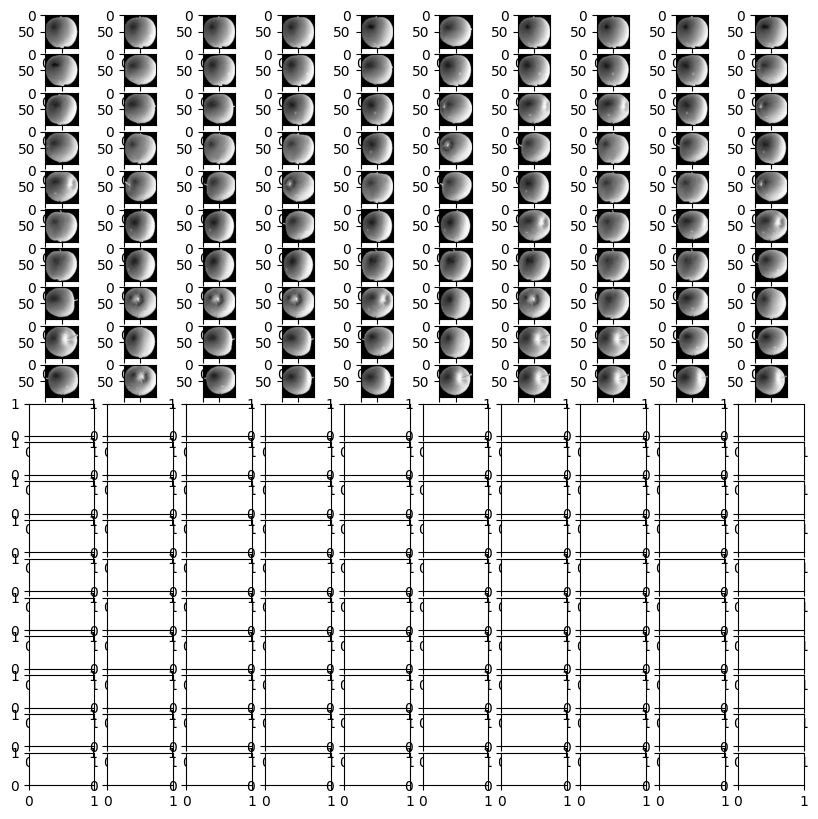

In [76]:
apple_index = np.argsort(abs_mean)[:200] # 평균치가 오름차순이 되도록 정렬

fig, axs = plt.subplots(20,10, figsize = (10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10 + j]], cmap = 'gray')

plt.show()